In [44]:
import numpy as np
from scipy import optimize
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.special import gamma
from math import pi
from scipy.special import wright_bessel
from scipy.integrate import quad

In [2]:
""" Data Importation """

#path = "C:/Users/Amaury/Documents/CentraleSupelec/3A/Projet/"
file = "Data issuers.xlsx"
market_cap = pd.read_excel(file, sheet_name="Mod Market Cap")
market_cap = market_cap.set_index("Dates").loc['2019-10-28':'2020-10-13']
debt = pd.read_excel(file, sheet_name="Gross Debt", nrows=1)

In [11]:
def grey_call_price(gama,S0,K,r,sigma,tau,Ns,Nmu):

    mu1=-sigma**2/2
    
    emu=0
    for n in range(Nmu):
        emu+= (-1)**n * gamma(1+2*n)*mu1**n / ( np.math.factorial(n)* gamma(1+2*gama*n)   )
    mu=-np.log(emu)

    x=np.log(S0/K) + r*tau


    c=-mu*tau**gama
    s=0

    for n in range (Ns):
        for m in range (1,Ns):
            s+= ((-1)**n)   *((x-mu*tau)**n) * ((c)**((m-n)/2)) /  (np.math.factorial(n)* gamma(1-gama*((n-m)/2)))

    return(s*K*np.exp(-r*tau)/2 )

C:\Users\amaur\AppData\Local\Temp\ipykernel_27860\2646785917.py:8: RuntimeWarning: divide by zero encountered in log
  mu=-np.log(emu)


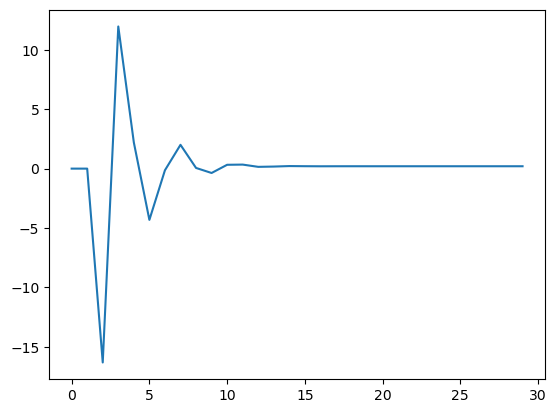

In [18]:
gama=0.9
S0=150
K=90
r=0.05
sigma=0.25
tau = 1

C=[ grey_call_price(gama,S0,K,r,sigma,tau,Ns=k,Nmu=k) for k in range (30)]

plt.plot(C)

In [22]:
wright_bessel(-0.1
              ,0.9, -
              2)

nan

In [31]:
from mpmath import *



In [35]:
nu=0.75
fp = lambda p: exp(-p**nu)

g=invertlaplace(fp,2)
float(g)

0.10718999293584146

In [39]:
def m_wright(nu,x):

    """
    x>0
    """

    fp = lambda p: exp(-p**nu)
    r= (1/x)**(1/nu)

    Mnu=float(invertlaplace(fp,r))*(r**(nu+1))/nu
    return(Mnu)



In [46]:
def Xdensity(x,beta,omega,t):
    d=np.sqrt(omega)*t**(beta/2)
    return(

        (0.5/d)*m_wright(beta/2,abs(x)/d)
    )

Verification: Xdensity est bien d'integrale 1 

In [50]:
#Verification: Xdensity est bien d'integrale 1 
beta=1.3
omega=10
t=2

quad(Xdensity,-np.inf,np.inf,args=(beta,omega,t))

(1.0, 9.232500802714278e-10)